In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/processed/unemployment_features.csv")
df["date"] = pd.to_datetime(df["date"])
df.head()


,date,unemployment_rate,year,month,lag_1,lag_3,lag_6,lag_12,rolling_3,rolling_6,rolling_12
0,2016-01-01,4.8,2016,1,5.0,5.0,5.2,5.7,4.966667,5.000000,5.200000
1,2016-02-01,4.9,2016,2,4.8,5.1,5.1,5.5,4.900000,4.966667,5.150000
2,2016-03-01,5.0,2016,3,4.9,5.0,5.0,5.4,4.900000,4.966667,5.116667
3,2016-04-01,5.1,2016,4,5.0,4.8,5.0,5.4,5.000000,4.983333,5.091667
4,2016-05-01,4.8,2016,5,5.1,4.9,5.1,5.6,4.966667,4.933333,5.025000


In [2]:
features = [
    "year", "month",
    "lag_1", "lag_3", "lag_6", "lag_12",
    "rolling_3", "rolling_6", "rolling_12"
]

X = df[features]
y = df["unemployment_rate"]


In [3]:
split_date = "2020-01-01"

train_idx = df["date"] < split_date
test_idx = df["date"] >= split_date

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

len(X_train), len(X_test)


(48, 60)

In [4]:
from sklearn.metrics import mean_absolute_error

y_pred_naive = X_test["lag_1"]
mae_naive = mean_absolute_error(y_test, y_pred_naive)

mae_naive


0.42833333333333345

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

mae_lr


0.8360677732124836

In [6]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

mae_rf


0.9993666666666698

In [7]:
results = pd.DataFrame({
    "Model": ["Naive (Lag-1)", "Linear Regression", "Random Forest"],
    "MAE": [mae_naive, mae_lr, mae_rf]
})

results


,Model,MAE
0,Naive (Lag-1),0.428333
1,Linear Regression,0.836068
2,Random Forest,0.999367


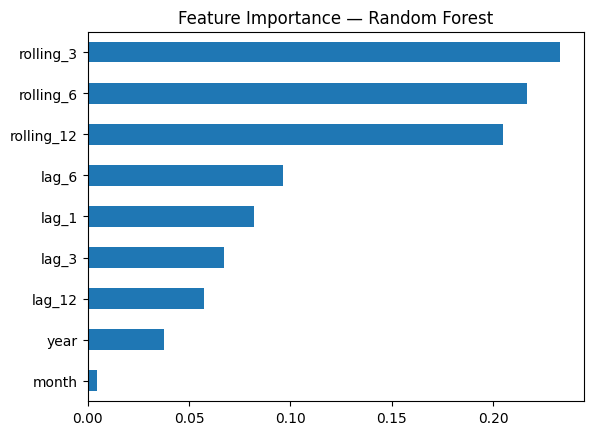

In [8]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
fi = pd.Series(importances, index=features).sort_values()

plt.figure()
fi.plot(kind="barh")
plt.title("Feature Importance — Random Forest")
plt.show()


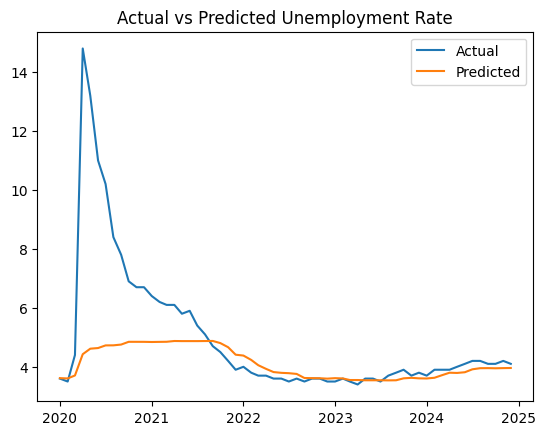

In [9]:
plt.figure()
plt.plot(df.loc[test_idx, "date"], y_test, label="Actual")
plt.plot(df.loc[test_idx, "date"], y_pred_rf, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Unemployment Rate")
plt.show()
